In [171]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import collections
import random

### Funkcje pomocnicze z poprzedniego zestawu

In [172]:
def calculate_nodes_position(n_of_nodes):
    nodes = {}
    for n in range(0, n_of_nodes):
        x = math.cos(2 * math.pi / n_of_nodes * n)
        y = math.sin(2 * math.pi / n_of_nodes * n)
        nodes.update({n: (x, y)})
    return nodes

In [173]:
def create_graph_visualization(matrix):
    """
    Function visualizes the matrix of neighbourhood of graph
    :param matrix: it's a numpy matrix, so using our functions from previous module
                    it is needed to be converted by numpy.matrix
    :return: None
    """
    sizes = matrix.shape
    if len(sizes) != 2 or sizes[0] != sizes[1]:
        print("Incorrect matrix!")
        return
    if len(matrix) > 0:
        nodes = calculate_nodes_position(len(matrix))
        plt.figure(figsize=(5, 5))
        graph_visualization = nx.from_numpy_matrix(matrix)
        nx.draw_networkx(graph_visualization, nodes, node_color="#FFE55E", font_size=15)
        plt.show()
    else:
        print("Empty matrix!")

In [174]:
def from_matrix_neighbour_to_list(matrix):
    list = {}

    i = 0
    for row in matrix:
        i += 1
        row_list = []
        lenght = len(row)
        for j in range(lenght):
            if row[j] == 1:
                row_list.append(j + 1)
        list[i] = row_list
    return list

### Prostre sortowanie.  Na wejściu przyjmuje ciąg graficzny. Zwraca posortowany ciąg graficzny

In [175]:
def bubble_sort(arr):
    temp = 0
    for i in range(0, len(arr)-1):
        for j in range(0, len(arr)-i-1):
            if arr[j] < arr[j+1]:
                temp = arr[j]
                arr[j] = arr[j+1]
                arr[j+1] = temp
    return arr

### Zliczanie nieparzystych elementów. Funkcja sprawdza czy w sekwencji jest nieparzysta liczba elementów nieparzystych. Na wejściu przyjmuje ciąg graficzny. Zwraca true jeżeli przekazany ciąg jest ciągiem graficznym, w przeciwnym wypadku false.

In [176]:
def calculate_odd_elements(arr):
    counter = 0;
    isDegreeSeq = True;
    for i in range(0, len(arr)):
        if arr[i] % 2 == 1:
            counter = counter + 1
    if counter % 2 == 1:
        isDegreeSeq = False
    return isDegreeSeq

# Zad1
### Algorytm sprawdzający czy sekwencja liczb jest ciągiem graficznym. Na wejściu przyjmuje ciąg graficzny. Zwraca true jeżeli przekazany ciąg jest ciągiem graficznym, w przeciwnym wypadku false

In [177]:
def degree_seq(arr):
    if calculate_odd_elements(arr):
        arr = bubble_sort(arr)
        while True:
            allZeros = all(elem == 0 for elem in arr)
            if allZeros == True:
                return allZeros
            isNegative = False
            for i in range(1, len(arr)):
                if arr[i] < 0:
                    isNegative = True
            if arr[0] < 0 or arr[0] >= len(arr) or isNegative:
                return False
            for i in range(1, arr[0]+1):
                arr[i] = arr[i] - 1
            arr[0] = 0
            arr = bubble_sort(arr)
    else:
        return False

### Test

In [178]:
print(degree_seq([4,4,3,1,2]))
print(degree_seq([4,2,2,3,2,1,4,2,2,2,2]))

False
True


### Wyznaczenie sumy tablicy jednowymiarowej macierzy. Funkcja jest używana to obliczania stopni wierzchołków dla macierzy sąsiedztwa. Przyjmuje rząd z macierzy sąsiedztwa. Zwraca sumę która jest stopniem wierzchołka.

In [179]:
def sum(arr):
    sum = 0
    for i in range(0, len(arr)):
        sum = sum + arr[i]
    return sum

### Sprawdzenie czy wierzchołki w macierzy sąsiedztwa mają stopnie zgodne z wymaganymi. Przyjmuje macierz sąsiedztwa oraz ciąg graficzny. Zwraca tablicę zawierającą indeksy wierzchołków o błędnych stopniach

In [180]:
def check_matrix_correctness(matrix, degrees):
    errorsArr = []
    tmp = 0
    for i in range(len(matrix)):
        tmp = sum(matrix[i])
        if tmp != degrees[i]:
            errorsArr.append(i)
    return errorsArr

### Funkcja naprawiająca macierze, które mają nieprawidłowe stopnie wierzchołków. Przyjmuje jako argument macierz sąsiedztwa reprezentującą graf oraz ciąg graficzny. Funkcja działa tylko na przekazanej do niej macierzy - nic nie zwraca.

In [181]:
def repair_matrix(matrix, copy):
    errors = check_matrix_correctness(matrix, copy)
    while not len(errors) == 0:
        if len(errors) % 2 == 0 and sum(matrix[errors[0]]) != sum(matrix[errors[1]]):
                firstIdx = -1
                secondIdx = -1
                if sum(matrix[errors[0]]) > sum(matrix[errors[1]]):
                    firstIdx = errors[0]
                    secondIdx = errors[1]
                else:
                    firstIdx = errors[1]
                    secondIdx = errors[0]
                #print("firstIdx = " + str(firstIdx) + " secondIdx = " + str(secondIdx))
                for j in range(len(matrix)):
                    if matrix[firstIdx][j] == 1 and matrix[j][secondIdx] == 0:
                        matrix[firstIdx][j] = 0
                        matrix[j][firstIdx] = 0
                        matrix[j][secondIdx] = 1
                        matrix[secondIdx][j] = 1
                        break;
                errors = check_matrix_correctness(matrix, copy)
        else:
            for elem in errors:
                changed = False
                firstIdx = random.randint(0, len(matrix)-1)
                secondIdx = random.randint(0, len(matrix)-1)
                iter = 0
                while firstIdx in errors or secondIdx in errors or firstIdx == secondIdx or sum(matrix[firstIdx]) != sum(matrix[secondIdx]) or matrix[firstIdx][secondIdx] != 1:
                    iter = iter + 1
                    firstIdx = random.randint(0, len(matrix)-1)
                    secondIdx = random.randint(0, len(matrix)-1)
                    if iter == 1000:
                        break
                if iter == 1000:
                    print("Couldn't repair matrix!")
                    break
                #print("firstIdx = " + str(firstIdx) + " secondIdx = " + str(secondIdx)) 
            
                if matrix[errors[0]][firstIdx] == 0 and matrix[errors[0]][secondIdx] == 0:
                    matrix[firstIdx][secondIdx] = 0
                    matrix[secondIdx][firstIdx] = 0
                    matrix[firstIdx][errors[0]] = 1
                    matrix[errors[0]][firstIdx] = 1
                    matrix[secondIdx][errors[0]] = 1
                    matrix[errors[0]][secondIdx] = 1
                errors = check_matrix_correctness(matrix, copy)
            if iter == 1000:
                print(matrix)
                break
                #print(errors)

### Funckja tworzy graf zbudowany na podstawie zadanego ciągu graficznego. Przyjmuje ciąg graficzny. Zwraca utworzony graf lub pustą tablice jeżeli grafu nie da się utworzyć na podstawie zadanego ciągu 

In [182]:
def create_graph_from_seq(arr):
    copy = arr.copy();
    zeros = {}
    zeros[0] = []
    if 0 in arr:
        arr = bubble_sort(arr)
    for i in range(len(arr)):
        if arr[i] == 0:
            zeros[arr[i]].append(i)
    matrix = [[0 for i in range(len(copy))] for j in range(len(copy))]
    counter = 0
    step = 1
    idx = 0
    copy = bubble_sort(copy)
    
    if degree_seq(arr):
        for step in range(0, len(copy)):
            counter = sum(matrix[step])
            for i in range(step+1, len(copy)):
                if not i in zeros[0] and not step in zeros[0]:
                    if sum(matrix[i]) < copy[i]:
                        if counter < copy[idx]:
                            matrix[step][i] = 1
                            matrix[i][step] = 1
                            counter = counter + 1        
            idx = idx + 1
        
        repair_matrix(matrix, copy)
        return matrix
    else:
        return []

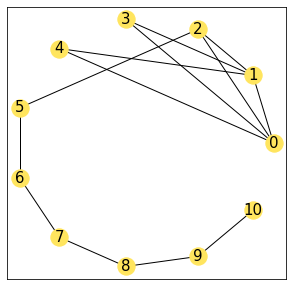

In [183]:
matrix = create_graph_from_seq([4, 2, 2, 3, 2, 1, 4, 2, 2, 2, 2])
create_graph_visualization(np.matrix(matrix))

In [184]:
matrix = create_graph_from_seq([4, 4, 3, 1, 2])
create_graph_visualization(np.matrix(matrix))

Incorrect matrix!


### Funkcja tworząca graf k-regularny. Przyjmuje k - stopień pojedyńczego wierzchołka, numOfVertices - liczbę wierzchołków. Zwraca macierz lub pustą tablice jeśli nie można utworzyć macierzy.

In [185]:
def generate_k_regular_graph(k, numOfVertices):
    arr = []
    for i in range(numOfVertices):
        arr.append(k)
    return create_graph_from_seq(arr)

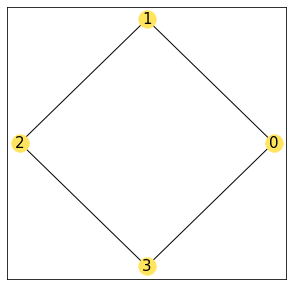

In [186]:
create_graph_visualization(np.matrix(generate_k_regular_graph(2, 4)))

In [187]:
create_graph_visualization(np.matrix(generate_k_regular_graph(3, 7)))

Incorrect matrix!


### Funkcja randomizująca graf. Przyjmuje graph - graf zadany macierzą sąsiedztwa, number - ilość randomizacji. Funkcja nic nie zwraca

In [188]:
def randomize(graph, number):
    if len(graph) > 0:
        for rands in range(number):
            i = 0
            size = len(graph)-1
            firstIdx = random.randint(0, size)
            secondIdx = random.randint(0, size)
            while graph[firstIdx][secondIdx] != 1:
                firstIdx = random.randint(0, size)
                i = 0
                while firstIdx == secondIdx:
                    secondIdx = random.randint(0, size)
                    i = i + 1
                    if i == 100:
                        break
                if i == 100:
                    break
            if i == 100:
                print("Couldn't randomize graph!")
                return
            i = 0
            thirdIdx = random.randint(0, size)
            fourthIdx = random.randint(0, size)
            while thirdIdx == firstIdx or thirdIdx == secondIdx or graph[thirdIdx][fourthIdx] != 1:
                thirdIdx = random.randint(0, size)
                while thirdIdx == fourthIdx or fourthIdx == firstIdx:
                    fourthIdx = random.randint(0, size)
                    i = i + 1
                    if i == 100:
                        break
                if i == 100:
                    break
            if i == 100:
                print("Couldn't randomize graph!")
                return
            #print("firstIdx = " + str(firstIdx) + " secondIdx = " + str(secondIdx) + " thirdIdx = " + str(thirdIdx) + " fourthIdx = " + str(fourthIdx))
            if firstIdx != fourthIdx and firstIdx != secondIdx and thirdIdx != fourthIdx and secondIdx != thirdIdx and graph[firstIdx][fourthIdx] == 0 and graph[secondIdx][thirdIdx] == 0:
                graph[firstIdx][secondIdx] = 0
                graph[secondIdx][firstIdx] = 0
                graph[firstIdx][fourthIdx] = 1
                graph[fourthIdx][firstIdx] = 1
                graph[thirdIdx][fourthIdx] = 0
                graph[fourthIdx][thirdIdx] = 0
                graph[secondIdx][thirdIdx] = 1
                graph[thirdIdx][secondIdx] = 1

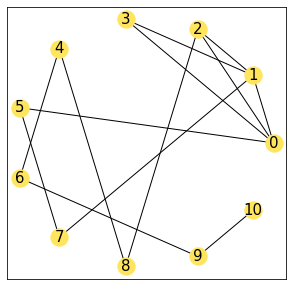

In [189]:
matrix = create_graph_from_seq([4, 2, 2, 3, 2, 1, 4, 2, 2, 2, 2])
randomize(matrix, 10)
create_graph_visualization(np.matrix(matrix))

In [190]:
matrix = generate_k_regular_graph(3, 5)
randomize(matrix, 10)
create_graph_visualization(np.matrix(matrix))

Incorrect matrix!


### Funkcja przeszukująca graf w głąb. Przyjmuje numer iteracji, wierzchołek, macierz sąsiedztwa i stos reprezentowany przez tablicę. Funkcja nic nie zwraca.

In [191]:
def components_r(nr, v, graph, comp):
    for j in range(len(graph.get(v))):
        if comp[graph.get(v)[j]-1] == -1:
            comp[graph.get(v)[j]-1] = nr
            components_r(nr, graph.get(v)[j], graph, comp)

### Funkcja wyznaczająca spójne składowe. Przyjmuje graf w postaci macierzy sąsiedztwa. Funkcja nic nie zwraca.

In [192]:
def components(graph):
    nr = 0
    comp = [-1 for i in range(len(graph))]
    for i in range(len(graph)):
        if comp[i] == -1:
            nr = nr + 1
            comp[i] = nr
            components_r(nr, i+1, graph, comp)
    counter = 0
    dicto = {}
    for i in range(len(comp)):
        if comp[i] != counter:
            counter = comp[i]
            dicto[counter] = []
    for i in range(len(comp)):
        dicto[comp[i]].append(i+1)
    sorted_dict = collections.OrderedDict(sorted(dicto.items()))
    temp = ""
    for i in range(1, len(sorted_dict)+1):
        temp = temp + str(i) + ") "
        for elem in sorted_dict[i]:
            temp = temp + str(elem) + " "
        print(temp)
        temp = ""
    longest = -1
    longest_dict_idx = 0
    for i in range(1, len(sorted_dict)+1):
        if len(sorted_dict[i]) > longest:
            longest = len(sorted_dict[i])
            longest_dict_idx = i
    print("Najwieksza skladowa ma numer " + str(longest_dict_idx) + ".")

### Test

In [193]:
components(from_matrix_neighbour_to_list(create_graph_from_seq([4,2,2,3,2,1,4,2,2,2,2])))

1) 1 2 3 4 5 6 7 8 9 10 11 
Najwieksza skladowa ma numer 1.


### Funkcje wyznaczająca cykl Eulera. Funkcja przyjmuje stos reprezentowany przez tablicę, który służy do przechowywania numerów wierzchołków, indeks reprezentujący wierzchołek, macierz będącą grafem.

In [194]:
def find_euler_cycle(cycle, idx, graph):
    for j in range(len(graph[idx])):
        if graph[idx][j] != 0:
            graph[idx][j] = 0
            graph[j][idx] = 0
            find_euler_cycle(cycle, j, graph)
    cycle.append(idx+1)

### Funkcja zwracająca losowy ciąg graficzny o zadanej długości. Funkcja przyjmuję liczbę wyznaczającą ilość wierzchołków tworzonego grafu

In [195]:
def prepare_random_vertices(numberOfVertices):
    vertices = [-1 for i in range(numberOfVertices)]
    for i in range(numberOfVertices):
        randNum = random.randint(1, numberOfVertices)
        while (randNum % 2 != 0 or randNum == numberOfVertices):
            randNum = random.randint(1, numberOfVertices)
        vertices[i] = randNum
    return vertices

### Funkcja tworząca losowy graf eulerowski. Funkcja nic nie zwraca

In [196]:
def generate_euler_graph(numberOfVertices):
    if numberOfVertices < 3:
        print(" ")
        return
    vertices = prepare_random_vertices(numberOfVertices)
    graph = create_graph_from_seq(vertices)
    if graph != -1:
        print(from_matrix_neighbour_to_list(graph))
    while graph == -1:
        vertices = prepare_random_vertices(numberOfVertices)
        graph = create_graph_from_seq(vertices)
        if graph != -1:
            print(from_matrix_neighbour_to_list(graph))
    cycle = []
    find_euler_cycle(cycle, 0, graph)
    path = ""
    for i in range(len(cycle)):
        if i == 0:
            path = path + str(cycle[i])
        else:
            path = path + " - " + str(cycle[i])
    print(path)

### Zmodyfikowany algorytm przechodzenia grafu w głąb. Pozwala znaleźć ścieżkę Hamiltona w grafie jeżeli taka istnieje. Jako parametry przyjmuje numer odwiedzanego wierzchołka, listę sąsiedztwa,  tablice z informacją o odwiedzonych wierzchołkach,  stos przechowujący numery odwiedzonych wierzchołków.

In [197]:
def modified_components_r(v, graph, comp, stack):
    for i in graph.get(v):
        if comp[i-1] == -1:
            comp[i-1] = 1
            stack.append(i)
            if len(stack) == len(graph):
                if not stack[0] in graph.get(i):
                    tmp = stack.pop()
                    comp[tmp-1] = -1
                else:
                    stack.append(stack[0])
            else:
                modified_components_r(i, graph, comp, stack)
                if len(stack) <= len(graph): # Ścieżka hamiltona w grafie ma o 1 wierzchołek więcej od wierzchołków grafu
                    tmp = stack.pop()
                    comp[tmp-1] = -1

### Funkcja wypisująca ścieżkę Hamiltona występującą w grafie. Jako argument przyjmuje graf w formie listy sąsiedztwa.

In [198]:
def find_hamilton_cycle(graph):
    comp = [-1 for i in range(len(graph))]
    stack = []
    for i in range(len(graph)):
        if comp[i] == -1:
            comp[i] = 1
            stack.append(i+1)
            modified_components_r(1, graph, comp, stack)
    if len(stack) == len(graph)+1:
        tmpStr = "["
        for i in range(len(stack)):
            if i < len(stack)-1:
                tmpStr = tmpStr + str(stack[i]) + " - "
            else:
                tmpStr = tmpStr + str(stack[i]) + "]"
        print(tmpStr)
    else:
        print("No hamilton cycle in this graph!")

In [201]:
matrix = create_graph_from_seq([3, 2, 0, 2, 3])
#print(matrix)
randomize(matrix, 100)
#print(matrix)
#find_hamilton_cycle(from_matrix_neighbour_to_list(matrix))
#find_hamilton_cycle({1: [2, 4, 5], 2: [1, 3, 5, 6], 3: [2, 4, 7], 4: [1, 3, 6, 7], 5: [1, 2, 8], 6: [2, 4, 8], 7: [3, 4, 8], 8: [5, 6, 7]})
#find_hamilton_cycle({1: [2, 4, 5, 6], 2: [1, 3, 5, 6], 3: [2, 4, 5], 4: [1, 3, 5], 5: [1, 2, 3, 4], 6: [1, 2]})

[1 - 4 - 3 - 5 - 2 - 6 - 1]
